# Credit Risk Binary Classification Using Machine Learning Models

By Jonathan Stanley, VIX Rakamin Academy Data Science @ ID/X Partners

In [7]:
# Machine Learning Libary
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from skopt import BayesSearchCV
from sklearn.metrics import *
from imblearn.over_sampling import SMOTE

# Model saving library
from joblib import dump, load
import pickle

# Standard Library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns





## A) Business Understanding

### Overview
Applying for loan to a lending company is normally a choice for most people who are in need of cash for urgent uses. Whether or not it is suitable to give a certain inidividual a loan is a problem that every lending company needs to consider. It is much more efficient to filter the selected loan receiver using a model based on the past dataset of the loan receivers.

For a lending company, they evaluate the status of every borrower using credit risk. **Credit risk** is the possibility of a loss resulting from a borrower's failure to repay a loan or meet contractual obligations.

To put it in a simple way, there is a risk that the borrower may not repay the loan which will result in a loss for the company.

### Objective
Applying machine learning model for credit risk classification which is used to label whether or not an individual is suitable to apply for loan in the company by analyzing informations from previous loan receivers to minimize failure of loan repayment.



## B) Data Understanding

### Dataset Information
The dataset used in this project is a loan record dataset from the lending company based from previous users and the variables used to determine their loan credit status. The target variable in this dataset is loan_status. 


In [8]:
# importing and previewing the dataset
loan_data = pd.read_csv('loan_data_2007_2014.csv', low_memory = False,index_col = 'Unnamed: 0')
loan_data.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1069639,1304742,7000,7000,7000.0,60 months,15.96,170.08,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1072053,1288686,3000,3000,3000.0,36 months,18.64,109.43,E,E1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1071795,1306957,5600,5600,5600.0,60 months,21.28,152.39,F,F2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1071570,1306721,5375,5375,5350.0,60 months,12.69,121.45,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
loan_data.shape

(466285, 74)

The dataset consists of 74 Columns with 466285 Rows

**Data Types**

In [10]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13  annu

In [11]:
# Statistical Summary for numeric columns
loan_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,466285.0,1.307973e+07,1.089371e+07,54734.00,3.639987e+06,1.010790e+07,2.073121e+07,3.809811e+07
member_id,466285.0,1.459766e+07,1.168237e+07,70473.00,4.379705e+06,1.194108e+07,2.300154e+07,4.086083e+07
loan_amnt,466285.0,1.431728e+04,8.286509e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt,466285.0,1.429180e+04,8.274371e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt_inv,466285.0,1.422233e+04,8.297638e+03,0.00,8.000000e+03,1.200000e+04,1.995000e+04,3.500000e+04
int_rate,466285.0,1.382924e+01,4.357587e+00,5.42,1.099000e+01,1.366000e+01,1.649000e+01,2.606000e+01
installment,466285.0,4.320612e+02,2.434855e+02,15.67,2.566900e+02,3.798900e+02,5.665800e+02,1.409990e+03
annual_inc,466281.0,7.327738e+04,5.496357e+04,1896.00,4.500000e+04,6.300000e+04,8.896000e+04,7.500000e+06
dti,466285.0,1.721876e+01,7.851121e+00,0.00,1.136000e+01,1.687000e+01,2.278000e+01,3.999000e+01
delinq_2yrs,466256.0,2.846784e-01,7.973651e-01,0.00,0.000000e+00,0.000000e+00,0.000000e+00,2.900000e+01


In [12]:
loan_data.describe(include='object').transpose()

,count,unique,top,freq
term,466285,2,36 months,337953
grade,466285,7,B,136929
sub_grade,466285,35,B3,31686
emp_title,438697,205475,Teacher,5399
emp_length,445277,11,10+ years,150049
home_ownership,466285,6,MORTGAGE,235875
verification_status,466285,3,Verified,168055
issue_d,466285,91,Oct-14,38782
loan_status,466285,9,Current,224226
pymnt_plan,466285,2,n,466276


### Exploratory Data Analysis (EDA)

**Loan Status (Target Variable)** 

Loan Status refers to the current status of the loan

In [13]:
print(loan_data['loan_status'].unique())

['Fully Paid' 'Charged Off' 'Current' 'Default' 'Late (31-120 days)'
 'In Grace Period' 'Late (16-30 days)'
 'Does not meet the credit policy. Status:Fully Paid'
 'Does not meet the credit policy. Status:Charged Off']


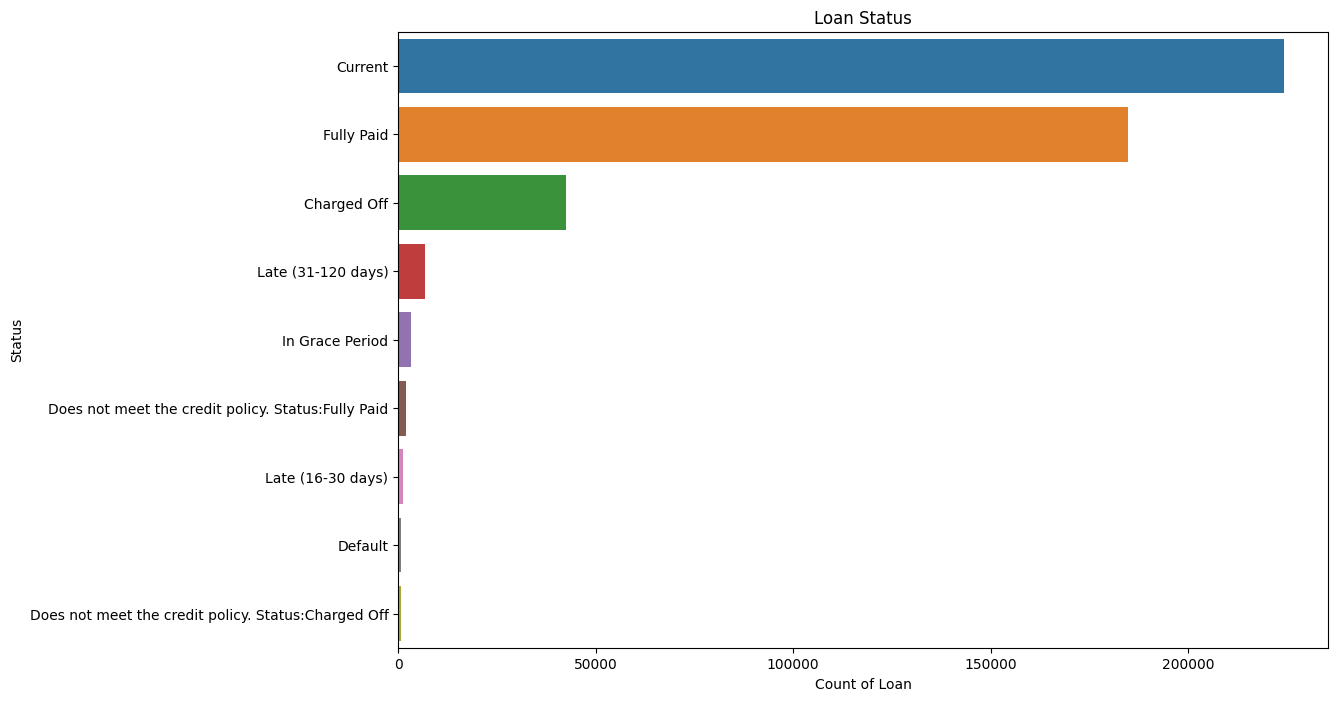

loan_status
Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: count, dtype: int64


In [14]:
# Bar Plot 
plt.figure(figsize=(12,8))
sns.countplot(y='loan_status', data=loan_data, order = loan_data['loan_status'].value_counts().index)

# Add the aesthetics
plt.title('Loan Status')
plt.xlabel('Count of Loan')
plt.ylabel('Status')

# Show the plot
plt.show()
print(loan_data['loan_status'].value_counts())

In this dataset, there are 9 different values regarding the loan_status column. The next step will be dividing the loan status between the good loans and bad loans. In this scenario, the "Current" and "In Grace Period" values will be excluded due to those are on going loans. Good loans will include "Fully Paid" values, while bad loans will include "Charged Off", "Late", "Does not meet the credit policy", and "Default" values.

In [15]:
good_loan = ["Current","In Grace Period","Fully Paid"]

bad_loan = ["Charged Off",
            "Default",
            "Late (31-120 days)",
            "Late(16 - 30 days )",
            "Does not meet the credit policy. Status:Fully Paid",
            "Does not meet the credit policy. Status:Charged Off"]

# function to categorize loan status
def loan_status_category(value):
    if value in good_loan:
        return 1
    elif value in bad_loan:
        return 0
# 0 = bad loan , 1 = good loan
loan_data ["loan_category"] = loan_data["loan_status"].apply(loan_status_category)



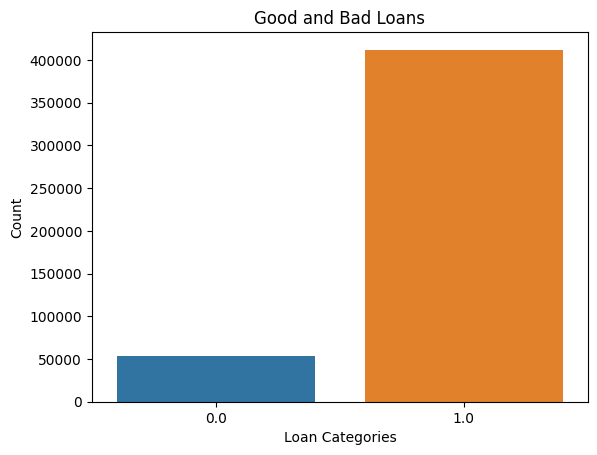

loan_category
1.0    412111
0.0     52956
Name: count, dtype: int64


In [16]:
good_bad_loan = loan_data[loan_data["loan_category"] < 2]

sns.countplot(data = good_bad_loan, x = "loan_category")
# Add the aesthetics

plt.title('Good and Bad Loans')
plt.xlabel('Loan Categories')
plt.ylabel('Count')

plt.show()


print(good_bad_loan["loan_category"].value_counts())

In [17]:
loan_data.drop('loan_status', axis=1, inplace=True)

## C) Data Preparation

### Data Preprocessing

**Converting the type of columns which contains dates to datetime**

In [18]:
loan_data['earliest_cr_line_date'] = pd.to_datetime(loan_data['earliest_cr_line'], format='%b-%y')
loan_data['issue_d_date'] = pd.to_datetime(loan_data['issue_d'], format='%b-%y')
loan_data['last_pymnt_d_date'] = pd.to_datetime(loan_data['last_pymnt_d'], format='%b-%y')
loan_data['next_pymnt_d_date'] = pd.to_datetime(loan_data['next_pymnt_d'], format='%b-%y')
loan_data['last_credit_pull_d_date'] = pd.to_datetime(loan_data['last_credit_pull_d'], format='%b-%y')

loan_data.drop(['earliest_cr_line', 'issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d'], axis=1, inplace=True)

date_columns = ['earliest_cr_line_date','issue_d_date','last_pymnt_d_date','next_pymnt_d_date','last_credit_pull_d_date']

In [19]:
loan_data[date_columns].describe().T

,count,mean,min,25%,50%,75%,max
earliest_cr_line_date,466256,1997-12-16 11:57:43.058920192,1969-01-01,1994-03-01,1999-03-01,2002-09-01,2068-12-01
issue_d_date,466285,2013-08-23 15:33:29.494623232,2007-06-01,2013-03-01,2014-01-01,2014-07-01,2014-12-01
last_pymnt_d_date,465909,2015-04-23 05:05:48.379619584,2007-12-01,2015-01-01,2015-12-01,2016-01-01,2016-01-01
next_pymnt_d_date,239071,2016-01-09 10:57:21.631983872,2007-12-01,2016-02-01,2016-02-01,2016-02-01,2016-03-01
last_credit_pull_d_date,466243,2015-08-30 16:56:26.436685824,2007-05-01,2015-11-01,2016-01-01,2016-01-01,2016-01-01


The dataset contains data from 2007 to 2016, to gain a better result from the prediction of the data, the date used to be the maximum limit of the periode of the data will be 31 December 2016.

In [20]:
end_of_period = pd.to_datetime('2016-12-31')

### Feature Engineering

**Credit History Length** 

The **'credit_history_length'** column will be created which contains information about how long the borrower had credit history (result format in days)

In [21]:
loan_data['credit_history_length'] = (end_of_period - loan_data['earliest_cr_line_date']).dt.days.astype(float)

In [22]:
loan_data['credit_history_length'].head()

0    11687.0
1     6484.0
2     5539.0
3     7639.0
4     7670.0
Name: credit_history_length, dtype: float64

In [23]:
loan_data['credit_history_length'].describe()

count    466256.000000
mean       6954.501585
std        2860.358510
min      -18963.000000
25%        5235.000000
50%        6515.000000
75%        8341.000000
max       17531.000000
Name: credit_history_length, dtype: float64

In [24]:
#Rows where credit_history_length have negative values
selected_columns = ['credit_history_length', 'earliest_cr_line_date']
rows_with_negative_values = loan_data[loan_data['credit_history_length'] < 0]
rows_with_negative_values[selected_columns]

,credit_history_length,earliest_cr_line_date
1580,-16680.0,2062-09-01
1770,-18872.0,2068-09-01
2799,-17411.0,2064-09-01
3282,-18506.0,2067-09-01
3359,-17564.0,2065-02-01
...,...,...
464003,-18628.0,2068-01-01
464260,-18079.0,2066-07-01
465100,-18536.0,2067-10-01
465500,-18506.0,2067-09-01


There are several rows where the earliest credit line date is in the future based from the referenced date (2016-12-31) which resulted in a negative value in the credit_history_length. These rows will not be used.

In [25]:
loan_data = loan_data[loan_data['credit_history_length'] >= 0]

**Days Since Last Payment**

Contains information regarding the number of days elapsed since the last payment date to the end of period observed

In [26]:
loan_data['days_since_last_payment'] = (end_of_period - loan_data['last_pymnt_d_date']).dt.days.astype(float)


In [27]:
loan_data['days_since_last_payment'].head()

0     730.0
1    1370.0
2     944.0
3     730.0
4     365.0
Name: days_since_last_payment, dtype: float64

In [28]:
loan_data['days_since_last_payment'].describe()

count    464712.000000
mean        617.778149
std         389.722988
min         365.000000
25%         365.000000
50%         396.000000
75%         730.000000
max        3318.000000
Name: days_since_last_payment, dtype: float64

**Days Until Next Payment**

Contains information regarding the number of days days from  the date until next payment to the end of period observed (result format in days)

In [29]:
# Calculate time_until_next_payment by subtracting the end of the period from next_pymnt_d_date
loan_data['days_until_next_payment'] = (end_of_period - loan_data['next_pymnt_d_date']).dt.days.astype(float)

In [30]:
loan_data['days_until_next_payment'].head()

0      NaN
1      NaN
2      NaN
3      NaN
4    334.0
Name: days_until_next_payment, dtype: float64

In [31]:
loan_data['days_until_next_payment'].describe()

count    238361.000000
mean        356.284325
std         183.592511
min         305.000000
25%         334.000000
50%         334.000000
75%         334.000000
max        3318.000000
Name: days_until_next_payment, dtype: float64

**Days Since Last Credit Pull**

Contains information regarding the number of days since the last credit pull to the end of period observed (result format in days)

In [32]:
# Calculate time_since_last_credit_pull by subtracting last_credit_pull_d_date from the end of the period
loan_data['days_since_last_credit_pull'] = (end_of_period - loan_data['last_credit_pull_d_date']).dt.days.astype(float)

In [33]:
loan_data['days_since_last_credit_pull'].head()

0     365.0
1    1217.0
2     365.0
3     730.0
4     365.0
Name: days_since_last_credit_pull, dtype: float64

In [34]:
loan_data['days_since_last_credit_pull'].describe()

count    465047.000000
mean        488.188353
std         292.893149
min         365.000000
25%         365.000000
50%         365.000000
75%         426.000000
max        3532.000000
Name: days_since_last_credit_pull, dtype: float64

In [35]:
loan_data[date_columns]

,earliest_cr_line_date,issue_d_date,last_pymnt_d_date,next_pymnt_d_date,last_credit_pull_d_date
0,1985-01-01,2011-12-01,2015-01-01,NaT,2016-01-01
1,1999-04-01,2011-12-01,2013-04-01,NaT,2013-09-01
2,2001-11-01,2011-12-01,2014-06-01,NaT,2016-01-01
3,1996-02-01,2011-12-01,2015-01-01,NaT,2015-01-01
4,1996-01-01,2011-12-01,2016-01-01,2016-02-01,2016-01-01
...,...,...,...,...,...
466280,2003-04-01,2014-01-01,2016-01-01,2016-02-01,2016-01-01
466281,1997-06-01,2014-01-01,2014-12-01,NaT,2016-01-01
466282,2001-12-01,2014-01-01,2016-01-01,2016-02-01,2015-12-01
466283,2003-02-01,2014-01-01,2014-12-01,NaT,2015-04-01


In [36]:
# Dropping The Date Columns
loan_data.drop(columns=date_columns, axis=1, inplace=True)


## Feature Selection

**Correlation Between Variables**

In [38]:
numeric_columns = loan_data.select_dtypes(include=[np.number]).columns
loan_data_numeric = loan_data[numeric_columns]

In [39]:
corr_matrix = loan_data_numeric.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
corr_drop = [column for column in upper.columns if any(upper[column] > 0.7)]

C:\Users\DELL\AppData\Local\Temp\ipykernel_20348\1453312426.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [40]:
corr_drop

['member_id',
 'funded_amnt',
 'funded_amnt_inv',
 'installment',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'mths_since_last_major_derog',
 'total_rev_hi_lim',
 'days_until_next_payment',
 'days_since_last_credit_pull']

<Axes: >

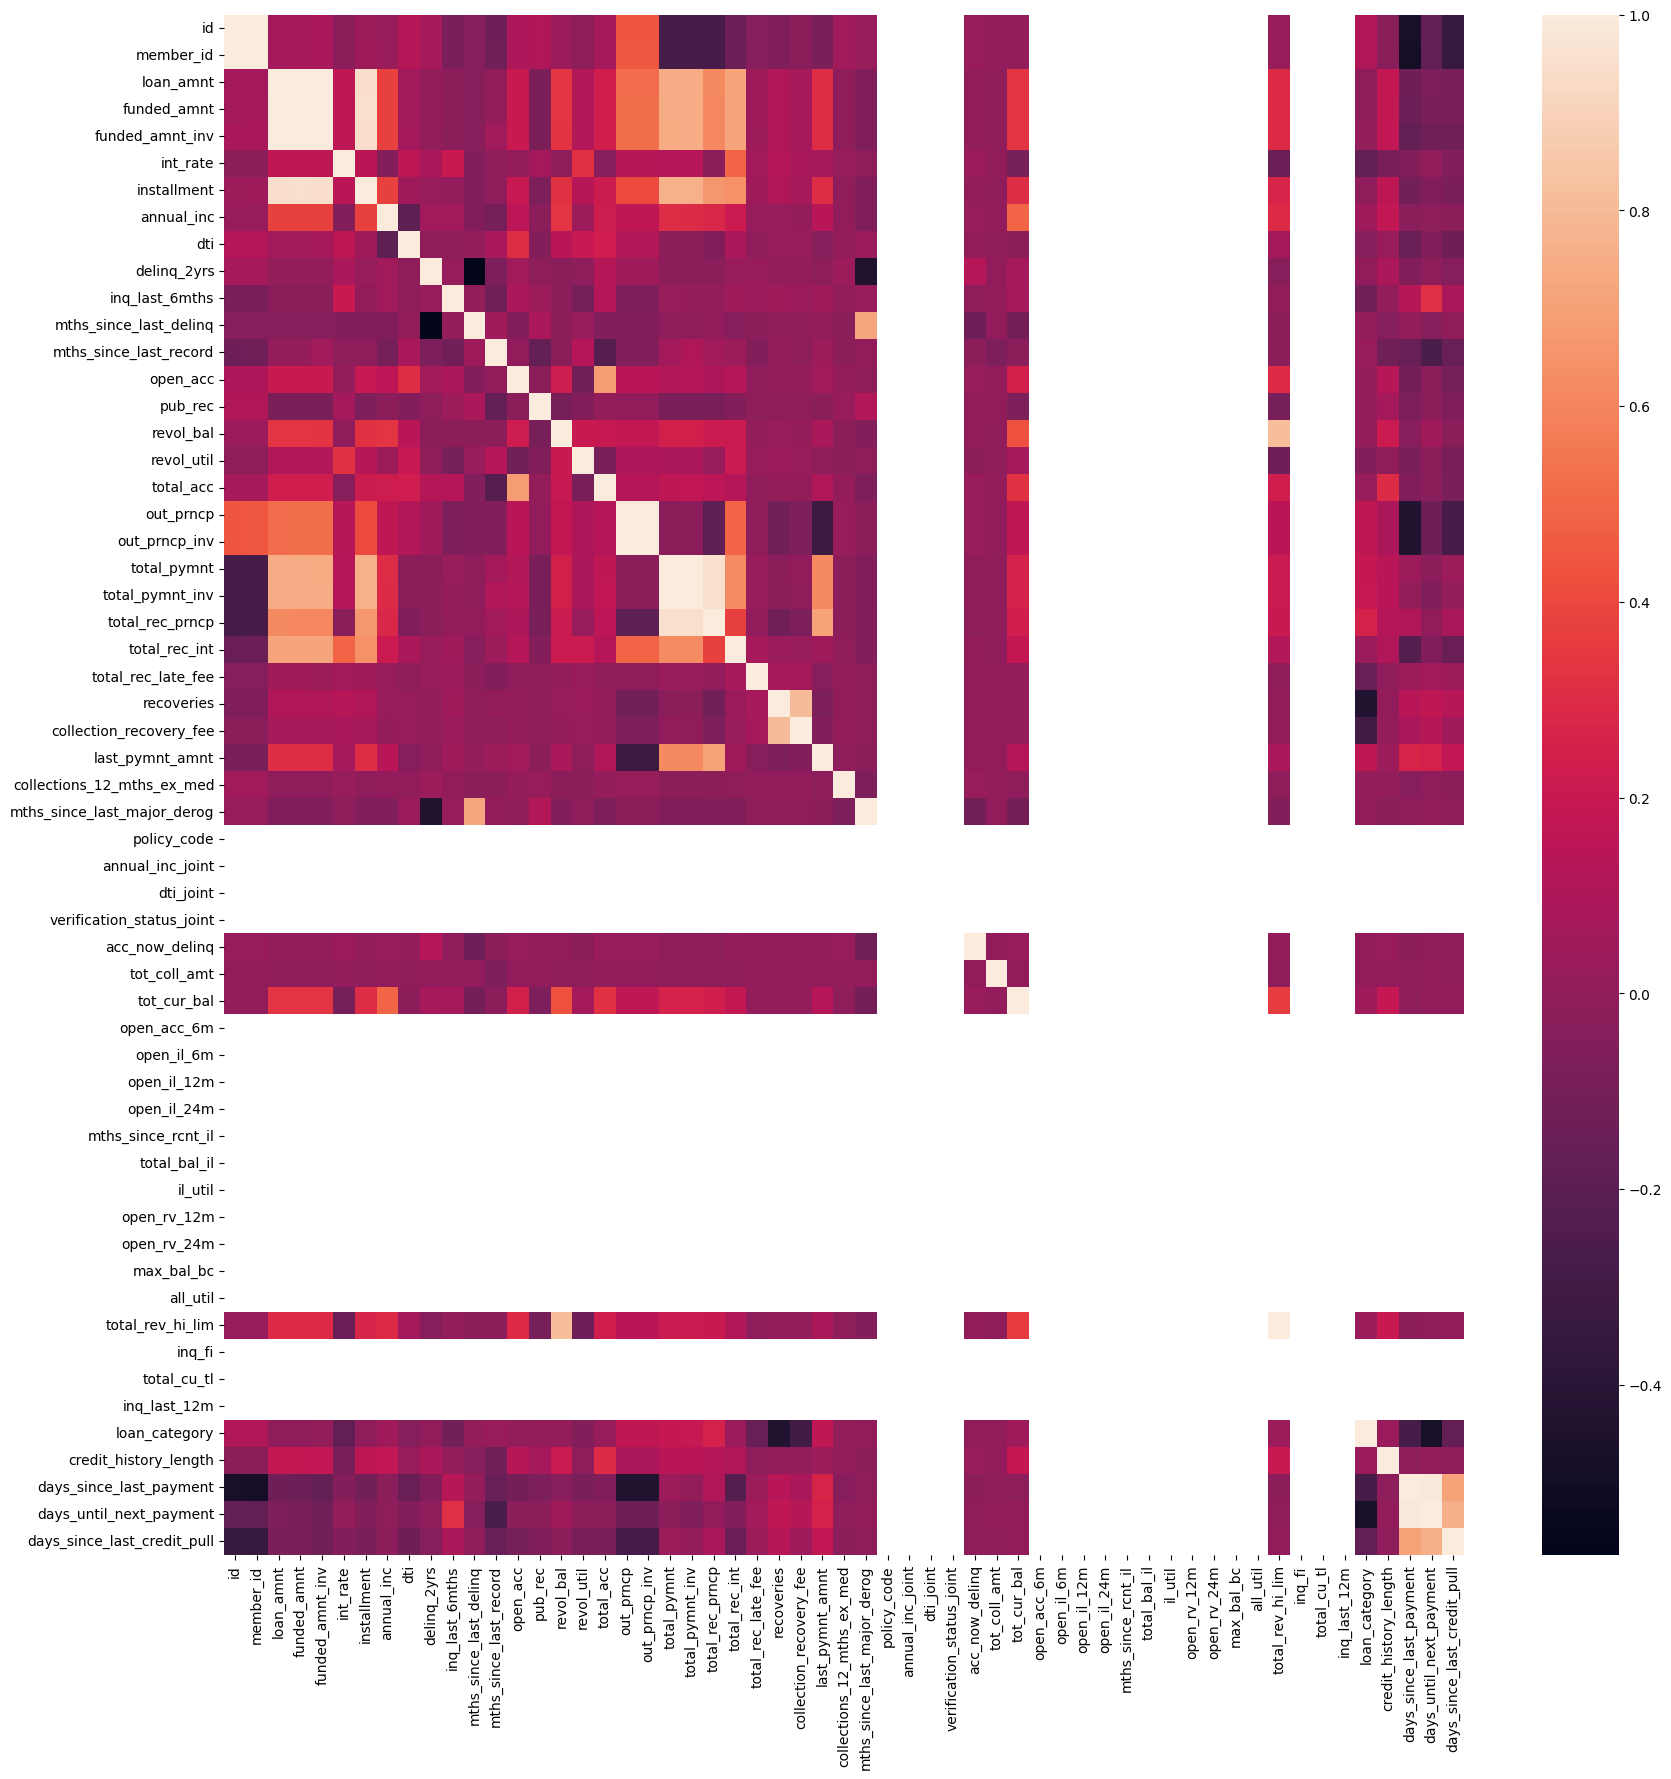

In [41]:
correlation_matrix = loan_data_numeric.corr()
plt.figure(figsize=(20,20))
sns.heatmap(loan_data_numeric.corr())

In [42]:
loan_data.drop(corr_drop, axis=1, inplace=True)

### Missing Values


In [43]:
#Columns with missing values
missing_values = loan_data.isna().sum()
missing_cols = missing_values[missing_values > 0]
print("Columns with missing values and its amount :")
print(missing_cols)

Columns with missing values and its amount :
emp_title                      27105
emp_length                     20578
desc                          339419
title                             21
mths_since_last_delinq        249798
mths_since_last_record        402738
revol_util                       311
collections_12_mths_ex_med       116
annual_inc_joint              465087
dti_joint                     465087
verification_status_joint     465087
tot_coll_amt                   70115
tot_cur_bal                    70115
open_acc_6m                   465087
open_il_6m                    465087
open_il_12m                   465087
open_il_24m                   465087
mths_since_rcnt_il            465087
total_bal_il                  465087
il_util                       465087
open_rv_12m                   465087
open_rv_24m                   465087
max_bal_bc                    465087
all_util                      465087
inq_fi                        465087
total_cu_tl                   

In [44]:
#Columns where all of the values are missing
all_missing_cols = list(loan_data.columns[loan_data.isnull().all()])
print("List Of Columns where all values are missing: ")
print(all_missing_cols)

List Of Columns where all values are missing: 
['annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m']


In [45]:
loan_data.drop(all_missing_cols,axis=1, inplace=True)

In [46]:
# Information regarding columns and their values
data_prep = pd.DataFrame()
data_prep.index = loan_data.columns
data_prep["unique_value"] = loan_data.nunique()
data_prep["missing_rate"] = loan_data.isna().mean()
data_prep["dtype"] = loan_data.dtypes
data_prep

,unique_value,missing_rate,dtype
id,465087,0.000000,int64
loan_amnt,1352,0.000000,int64
term,2,0.000000,object
int_rate,506,0.000000,float64
grade,7,0.000000,object
sub_grade,35,0.000000,object
emp_title,205209,0.058279,object
emp_length,11,0.044245,object
home_ownership,6,0.000000,object
annual_inc,31785,0.000000,float64


In [47]:
# Filter rows where missing_rate is not 0.0
filtered_data = data_prep[data_prep["missing_rate"] != 0.0]

# Display the filtered data
print(filtered_data)


                            unique_value  missing_rate    dtype
emp_title                         205209      0.058279   object
emp_length                            11      0.044245   object
desc                              124131      0.729797   object
title                              62965      0.000045   object
mths_since_last_delinq               145      0.537100  float64
mths_since_last_record               123      0.865941  float64
revol_util                          1268      0.000669  float64
collections_12_mths_ex_med             9      0.000249  float64
tot_coll_amt                        6303      0.150757  float64
tot_cur_bal                       220334      0.150757  float64
loan_category                          2      0.002608  float64
days_since_last_payment               98      0.000806  float64


In [48]:
# Columns with more than 70% missing values
missing_columns = list(data_prep[data_prep["missing_rate"] > 0.7].index)
print("Columns with more than 70% missing values :")
print(missing_columns)

Columns with more than 70% missing values :
['desc', 'mths_since_last_record']


### Features with unique and specific value

In [49]:
# Columns where all their values are unique
unique_columns = list(data_prep[data_prep["unique_value"] == loan_data.shape[0]].index)
print("Columns where all their values are unique :")
print(unique_columns)

Columns where all their values are unique :
['id', 'url']


In [50]:
# Categorical Columns with too many unique values 
category_data = data_prep[data_prep["dtype"] == "object"]
unique_category_columns = list(category_data[category_data["unique_value"] > 10000].index)
print("Categorical Columns with unique values :")
print(unique_category_columns)

Categorical Columns with unique values :
['emp_title', 'url', 'desc', 'title']


In [51]:
# Columns with only one specific value
single_value_columns = list(data_prep[data_prep["unique_value"] == 1].index)
print(single_value_columns)

['policy_code', 'application_type']


### Irrelevant features

Features which are not relevant to the prediction . "sub_grade" feature is already represented by the feature "grade" and "zip_code" is also represented by "addr_state" feature.

In [52]:
# Columns with irrelevant features
irrelevant_columns = ["sub_grade","addr_state"]
#There will be several columns which is irrelevant in building a model

In [ ]:
# Dropping all columns after the feature selection proccess
dropped_columns = missing_columns + unique_columns + unique_category_columns + single_value_columns + irrelevant_columns
print(dropped_columns)


In [54]:
# Naming the cleaned dataset as clean_data
clean_data = loan_data.copy()
clean_data.drop(columns = dropped_columns,inplace = True,axis = 1)
print(clean_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 465087 entries, 0 to 466284
Data columns (total 31 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   465087 non-null  int64  
 1   term                        465087 non-null  object 
 2   int_rate                    465087 non-null  float64
 3   grade                       465087 non-null  object 
 4   emp_length                  444509 non-null  object 
 5   home_ownership              465087 non-null  object 
 6   annual_inc                  465087 non-null  float64
 7   verification_status         465087 non-null  object 
 8   pymnt_plan                  465087 non-null  object 
 9   purpose                     465087 non-null  object 
 10  addr_state                  465087 non-null  object 
 11  dti                         465087 non-null  float64
 12  delinq_2yrs                 465087 non-null  float64
 13  inq_last_6mths     

### Data imputation

The Dataset used will divided into two types, categorical , and numerical columns. The remaining missing value in each columns will be handled separately. 

In [55]:
# Separating numerical and object categories of the new dataset
num_cols = clean_data.select_dtypes(include=['float64', 'int64']).columns
cat_cols = clean_data.select_dtypes(include=['object']).columns

**Categorical Columns**

In [56]:
cat_cols

Index(['term', 'grade', 'emp_length', 'home_ownership', 'verification_status',
       'pymnt_plan', 'purpose', 'addr_state', 'initial_list_status'],
      dtype='object')

The rest of the missing categorical value will be replaced with the mode statistical feature

In [57]:
for col in cat_cols:
    # Calculate the mode of the column
    mode = clean_data[col].mode()[0]
    # Replace all missing values in the column with the mode
    clean_data[col].fillna(mode, inplace=True)


In [58]:
categorical_data = clean_data.loc[:,cat_cols]

In [59]:
# Checking if the mising values are fully handled
categorical_data.isna().sum()

term                   0
grade                  0
emp_length             0
home_ownership         0
verification_status    0
pymnt_plan             0
purpose                0
addr_state             0
initial_list_status    0
dtype: int64

**Numerical Columns**

In [60]:
num_cols

Index(['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'total_rec_late_fee', 'recoveries', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'loan_category',
       'credit_history_length', 'days_since_last_payment'],
      dtype='object')

In [61]:
clean_data[num_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,465087.0,14316.230458,8284.749212,500.00,8000.00,12000.00,20000.00,35000.00
int_rate,465087.0,13.831620,4.357853,5.42,10.99,13.66,16.49,26.06
annual_inc,465087.0,73263.724465,54935.636731,1896.00,45000.00,63000.00,88824.00,7500000.00
dti,465087.0,17.218658,7.850234,0.00,11.36,16.87,22.78,39.99
delinq_2yrs,465087.0,0.284375,0.796831,0.00,0.00,0.00,0.00,29.00
inq_last_6mths,465087.0,0.804740,1.091565,0.00,0.00,0.00,1.00,33.00
mths_since_last_delinq,215289.0,34.107600,21.776187,0.00,16.00,31.00,49.00,188.00
open_acc,465087.0,11.185974,4.987697,0.00,8.00,10.00,14.00,84.00
pub_rec,465087.0,0.160112,0.509220,0.00,0.00,0.00,0.00,63.00
revol_bal,465087.0,16216.044108,20631.717158,0.00,6413.00,11759.00,20321.50,2568995.00


The missing values from numerical columns will be replaced with the statistical feature median due to most of them being skewed.

In [62]:
for col in num_cols:
    # Calculate the median of the column
    median = clean_data[col].median()
    # Replace all missing values in the column with the mode
    clean_data[col].fillna(median, inplace=True)


In [63]:
missing_num_cols = clean_data[num_cols].isna().sum()
missing_num_cols

loan_amnt                     0
int_rate                      0
annual_inc                    0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
mths_since_last_delinq        0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
out_prncp                     0
total_rec_late_fee            0
recoveries                    0
collections_12_mths_ex_med    0
acc_now_delinq                0
tot_coll_amt                  0
tot_cur_bal                   0
loan_category                 0
credit_history_length         0
days_since_last_payment       0
dtype: int64

In [64]:
#Separating label columns and predictor columns
label = clean_data["loan_category"]
predictor = clean_data.drop("loan_category",axis=1)

In [65]:
#predictor numerical features
pred_num = predictor.select_dtypes(include=["float64","int64"])
# predictor categorical features
pred_cat= predictor.select_dtypes(include="object")
pred_cat.describe().T

,count,unique,top,freq
term,465087,2,36 months,337058
grade,465087,7,B,136540
emp_length,465087,11,10+ years,170281
home_ownership,465087,6,MORTGAGE,235204
verification_status,465087,3,Verified,167439
pymnt_plan,465087,2,n,465078
purpose,465087,14,debt_consolidation,273587
addr_state,465087,50,CA,71240
initial_list_status,465087,2,f,302241


In [66]:
#OneHotEncode
pred_cat_s = pd.get_dummies(pred_cat)
pred_cat_s

,term_ 36 months,term_ 60 months,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,emp_length_1 year,...,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_f,initial_list_status_w
0,True,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,True,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,True,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,True,False,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,False,True,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
466281,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
466282,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
466283,True,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [67]:
pred_cat_s.reset_index(drop=True, inplace=True)

In [68]:
pred_num

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,...,total_acc,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,credit_history_length,days_since_last_payment
0,5000,10.65,24000.0,27.65,0.0,1.0,31.0,3.0,0.0,13648,...,9.0,0.00,0.00,0.00,0.0,0.0,0.0,81559.5,11687.0,730.0
1,2500,15.27,30000.0,1.00,0.0,5.0,31.0,3.0,0.0,1687,...,4.0,0.00,0.00,117.08,0.0,0.0,0.0,81559.5,6484.0,1370.0
2,2400,15.96,12252.0,8.72,0.0,2.0,31.0,2.0,0.0,2956,...,10.0,0.00,0.00,0.00,0.0,0.0,0.0,81559.5,5539.0,944.0
3,10000,13.49,49200.0,20.00,0.0,1.0,35.0,10.0,0.0,5598,...,37.0,0.00,16.97,0.00,0.0,0.0,0.0,81559.5,7639.0,730.0
4,3000,12.69,80000.0,17.94,0.0,0.0,38.0,15.0,0.0,27783,...,38.0,766.90,0.00,0.00,0.0,0.0,0.0,81559.5,7670.0,365.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,18400,14.47,110000.0,19.85,0.0,2.0,31.0,18.0,0.0,23208,...,36.0,12574.00,0.00,0.00,0.0,0.0,0.0,294998.0,5023.0,365.0
466281,22000,19.97,78000.0,18.45,0.0,5.0,31.0,18.0,1.0,18238,...,30.0,0.00,0.00,0.00,0.0,0.0,0.0,221830.0,7153.0,761.0
466282,20700,16.99,46000.0,25.65,0.0,2.0,65.0,18.0,0.0,6688,...,43.0,14428.31,0.00,0.00,0.0,0.0,0.0,73598.0,5509.0,365.0
466283,2000,7.90,83000.0,5.39,3.0,1.0,13.0,21.0,0.0,11404,...,27.0,0.00,0.00,0.00,0.0,0.0,0.0,591610.0,5082.0,761.0


In [69]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
pred_num_s = pd.DataFrame(ss.fit_transform(pred_num), columns=pred_num.columns)

In [70]:
pred_num_s.reset_index(drop=True, inplace=True)

In [71]:
pred_num_s

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,...,total_acc,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,credit_history_length,days_since_last_payment
0,-1.124505,-0.730090,-0.896754,1.328795,-0.356882,0.178881,-0.096566,-1.641235,-0.314426,-0.124471,...,-1.384252,-0.693828,-0.123511,-0.154558,-0.08363,-0.058219,-0.012044,-0.343191,1.809016,0.288491
1,-1.426264,0.330067,-0.787536,-2.066012,-0.356882,3.843348,-0.096566,-1.641235,-0.314426,-0.704210,...,-1.815303,-0.693828,-0.123511,0.057543,-0.08363,-0.058219,-0.012044,-0.343191,-0.206250,1.931133
2,-1.438335,0.488402,-1.110605,-1.082600,-0.356882,1.094998,-0.096566,-1.841729,-0.314426,-0.642703,...,-1.298041,-0.693828,-0.123511,-0.154558,-0.08363,-0.058219,-0.012044,-0.343191,-0.572275,0.837749
3,-0.520986,-0.078392,-0.438035,0.354301,-0.356882,0.178881,0.171951,-0.237780,-0.314426,-0.514647,...,1.029635,-0.693828,3.105119,-0.154558,-0.08363,-0.058219,-0.012044,-0.343191,0.241113,0.288491
4,-1.365913,-0.261969,0.122621,0.091888,-0.356882,-0.737235,0.373340,0.764688,-0.314426,0.560640,...,1.115845,-0.573135,-0.123511,-0.154558,-0.08363,-0.058219,-0.012044,-0.343191,0.253120,-0.648328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465082,0.492927,0.146490,0.668716,0.335193,-0.356882,1.094998,-0.096566,1.366168,-0.314426,0.338894,...,0.943425,1.285037,-0.123511,-0.154558,-0.08363,-0.058219,-0.012044,1.164290,-0.772136,-0.648328
465083,0.927461,1.408580,0.086215,0.156854,-0.356882,3.843348,-0.096566,1.366168,1.649364,0.098002,...,0.426163,-0.693828,-0.123511,-0.154558,-0.08363,-0.058219,-0.012044,0.647516,0.052872,0.368056
465084,0.770546,0.724757,-0.496285,1.074025,-0.356882,1.094998,2.185835,1.366168,-0.314426,-0.461816,...,1.546896,1.576863,-0.123511,-0.154558,-0.08363,-0.058219,-0.012044,-0.399422,-0.583895,-0.648328
465085,-1.486616,-1.361135,0.177231,-1.506792,3.408033,0.178881,-1.304896,1.967649,-0.314426,-0.233236,...,0.167533,-0.693828,-0.123511,-0.154558,-0.08363,-0.058219,-0.012044,3.259211,-0.749284,0.368056


In [72]:
#all predictor 

all_predictor = pd.concat([pred_num_s,pred_cat_s],axis=1)
all_predictor

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,...,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_f,initial_list_status_w
0,-1.124505,-0.730090,-0.896754,1.328795,-0.356882,0.178881,-0.096566,-1.641235,-0.314426,-0.124471,...,False,False,False,False,False,False,False,False,True,False
1,-1.426264,0.330067,-0.787536,-2.066012,-0.356882,3.843348,-0.096566,-1.641235,-0.314426,-0.704210,...,False,False,False,False,False,False,False,False,True,False
2,-1.438335,0.488402,-1.110605,-1.082600,-0.356882,1.094998,-0.096566,-1.841729,-0.314426,-0.642703,...,False,False,False,False,False,False,False,False,True,False
3,-0.520986,-0.078392,-0.438035,0.354301,-0.356882,0.178881,0.171951,-0.237780,-0.314426,-0.514647,...,False,False,False,False,False,False,False,False,True,False
4,-1.365913,-0.261969,0.122621,0.091888,-0.356882,-0.737235,0.373340,0.764688,-0.314426,0.560640,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465082,0.492927,0.146490,0.668716,0.335193,-0.356882,1.094998,-0.096566,1.366168,-0.314426,0.338894,...,True,False,False,False,False,False,False,False,False,True
465083,0.927461,1.408580,0.086215,0.156854,-0.356882,3.843348,-0.096566,1.366168,1.649364,0.098002,...,False,False,False,False,False,False,False,False,True,False
465084,0.770546,0.724757,-0.496285,1.074025,-0.356882,1.094998,2.185835,1.366168,-0.314426,-0.461816,...,False,False,False,False,False,False,False,False,True,False
465085,-1.486616,-1.361135,0.177231,-1.506792,3.408033,0.178881,-1.304896,1.967649,-0.314426,-0.233236,...,False,False,False,False,False,False,False,False,False,True


## Train Test Split (SMOTE resampling)

In [73]:
# Train Test Split

X = all_predictor
y = label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

loan_category
1.0    288474
0.0     37086
Name: count, dtype: int64


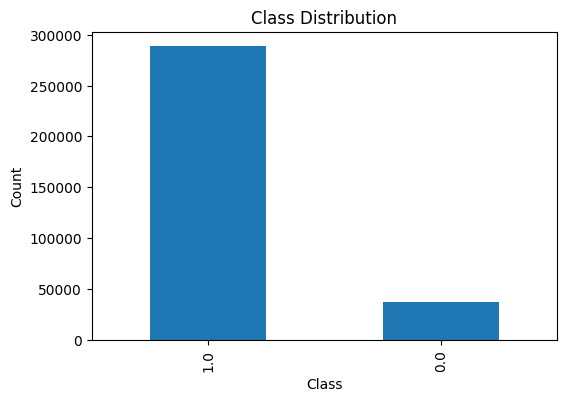

In [74]:
# Target Variable Class Distribution
class_counts = pd.Series(y_train).value_counts()

print(class_counts)

plt.figure(figsize=(6, 4))
class_counts.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

In [75]:
# Imbalance ratio
class_counts = pd.Series(y_train).value_counts()
imbalance_ratio = np.max(class_counts) / np.min(class_counts)
print("Imbalance ratio:", imbalance_ratio)


Imbalance ratio: 7.778514803429866


In [71]:
# SMOTE
X_train_resampled, y_train_resampled = SMOTE().fit_resample(X_train, y_train)

# Class count after SMOTE
class_counts = pd.Series(y_train_resampled).value_counts()
print(class_counts)


loan_category
1.0    288474
0.0    288474
Name: count, dtype: int64


## D) Data Modeling

To predict whether or not a loan request should be accepted or declined, a Random ForestClassifier model is going to be used. the label variable loan_category consists of two value which is 1 for good loan, and 0 for bad loan. The other predictor variables will be used to train the model regarding predicting whether a loan is good or bad based on the data provided.

**Saving and Loading Models**

In [3]:
#Function for saving and loading models


def save_model(model, filename):
    try:
        dump(model, filename)
        print(f"Model saved to {filename}")
    except Exception as e:
        print(f"Error saving the model: {e}")

def load_model(filename):
    try:
        loaded_model = load(filename)
        print(f"Model loaded from {filename}")
        return loaded_model
    except Exception as e:
        print(f"Error loading the model: {e}")
        return None

**Logistic Regression Classifier**

No hyperparameter tuning is used for this model due to its linearity and simplicity which usually results in the hyperparameters not having a signifiance impact towards the prediction result when comparing tuned to non-tuned parameters.

In [138]:
# Model Building (Logistic Regression Classifier)
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression(random_state=32, solver= "liblinear")

# Model Training 
lrc.fit(X_train_resampled, y_train_resampled)

# Prediction 
y_pred_lrc = lrc.predict(X_test)
print(classification_report(y_test, y_pred_lrc))

# Probabilities
y_prob_lrc = lrc.predict_proba(X_test)[:, 1]

In [103]:
save_model(lrc,"lrc_model")

Model saved to lrc_model


**KNN Classifier**

Due to the large amount of data used in this project, using KNN takes a lot of processing time and may not be the optimal model considering the time and accuracy trade-off. In addition to that, Hyperparameter tuning and also SMOTE oversampling is implemented too which will increase the amount of time needed for training the model.

In [95]:
# Parameters KNN
param_space_knn = {
    'n_neighbors': (1, 50),
    'weights': ['uniform', 'distance'],
    'p': (1, 2),
    'leaf_size': (1, 50),
}


In [98]:
# KNN Classifier
knn = KNeighborsClassifier()

# Bayes Search CV
bayes_search_knn = BayesSearchCV(
    estimator=knn,
    search_spaces=param_space_knn,
    n_iter=10, 
    cv=4,
    verbose=0,
    n_jobs=-1 
)
bayes_search_knn.fit(X_train_resampled, y_train_resampled)

#Best parameters
best_params_knn = bayes_search_knn.best_params_
best_score_knn = bayes_search_knn.best_score_

# Model Training 
best_knn = KNeighborsClassifier(**best_params_knn)
best_knn.fit(X_train_resampled, y_train_resampled)

# KNN prediction
y_pred_knn = best_knn.predict(X_test)
print("\nK-Nearest Neighbors Classification Report:")
print(classification_report(y_test, y_pred_knn))

y_prob_knn = best_knn.predict_proba(X_test)[:, 1]


K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

         0.0       0.53      0.46      0.49     15688
         1.0       0.93      0.95      0.94    123839

    accuracy                           0.89    139527
   macro avg       0.73      0.71      0.72    139527
weighted avg       0.89      0.89      0.89    139527



In [118]:
y_prob_knn = best_knn.predict_proba(X_test)[:, 1]

In [104]:
save_model(best_knn,"knn_classifier_model")

Model saved to knn_classifier_model


**Random Forest Classifier**

In [74]:
#rf parameters
param_space_rf = {
    'n_estimators': (100, 200),
    'max_depth': (1, 10),
    'min_samples_split': (2, 10),
    'max_features': ['sqrt', 'log2']
}

In [74]:
# Model building (Random Forest Classifier)
rfc = RandomForestClassifier(random_state=32)

# Bayes Search CV
bayes_search = BayesSearchCV(
    estimator=rfc,
    search_spaces=param_space_rf,
    n_iter=10, 
    cv=4,
    verbose=0,
    n_jobs=-1 
)
bayes_search.fit(X_train_resampled, y_train_resampled)

# Best parameters and scores
best_params = bayes_search.best_params_
best_score = bayes_search.best_score_

# Model Training with the best parameters
best_rfc = RandomForestClassifier(**best_params, random_state=32)
best_rfc.fit(X_train_resampled, y_train_resampled)

# Prediction and Classification Report
y_pred_rfc = best_rfc.predict(X_test)
print(classification_report(y_test, y_pred_rfc))

# Predicted probabilities
y_prob_rfc = best_rfc.predict_proba(X_test)[:, 1]

              precision    recall  f1-score   support

         0.0       0.44      0.81      0.57     15688
         1.0       0.97      0.87      0.92    123839

    accuracy                           0.86    139527
   macro avg       0.71      0.84      0.74    139527
weighted avg       0.91      0.86      0.88    139527



In [105]:
save_model(best_rfc,"random_forest_model")

Model saved to random_forest_model


In [76]:
best_rfc = load_model("random_forest_model")


# Prediction and Classification Report
y_pred_rfc = best_rfc.predict(X_test)
print(classification_report(y_test, y_pred_rfc))

# Predicted probabilities
y_prob_rfc = best_rfc.predict_proba(X_test)[:, 1]

Model loaded from random_forest_model
              precision    recall  f1-score   support

         0.0       0.44      0.81      0.57     15688
         1.0       0.97      0.87      0.92    123839

    accuracy                           0.86    139527
   macro avg       0.71      0.84      0.74    139527
weighted avg       0.91      0.86      0.88    139527



## Model Evaluation

In [77]:
# Evaluation Function

def calculate_sensitivity(y_true, y_pred):
    # Confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    
    # Sensitivity 
    sensitivity = tp / (tp + fn)

    return sensitivity

def calculate_specificity(y_true, y_pred):
    # Confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    # Specificity 
    specificity = tn / (tn + fp)

    return specificity

### Logistic Regression Eval

In [123]:
# Logistic Reggression Classifier Evaluation

sensitivity_lrc = calculate_sensitivity(y_test,y_pred_lrc)
specificity_lrc = calculate_specificity(y_test,y_pred_lrc)
auc_roc_lrc = roc_auc_score(y_test,y_prob_lrc)


In [124]:
# Print evaluation metrics
print('Sensitivity_LRC: {:.4f}'.format(sensitivity_lrc))
print('Specificity: {:.4f}'.format(specificity_lrc))
print('AUC Score: {:.4f}'.format(auc_roc_lrc))


Sensitivity_LRC: 0.9981
Specificity: 0.4627
AUC Score: 0.8660


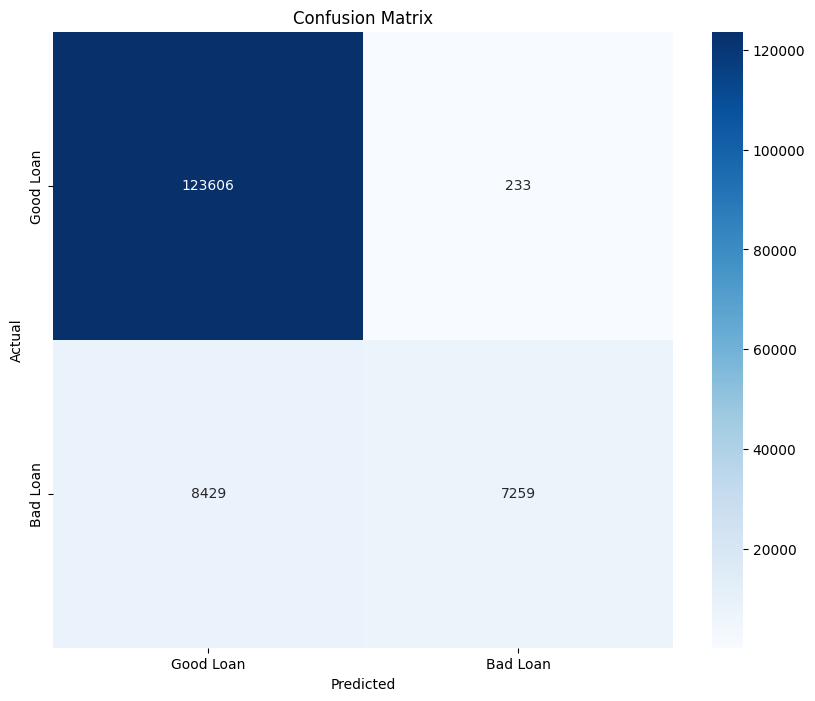

In [114]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_lrc)

# Reverse the order of values in the confusion matrix
conf_matrix = np.flip(conf_matrix)

# Define class labels
class_labels = ['Good Loan', 'Bad Loan']  # Reverse the order to match the confusion matrix

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

###  KNN Eval

In [125]:
# Logistic Reggression Classifier Evaluation

sensitivity_knn = calculate_sensitivity(y_test,y_pred_knn)
specificity_knn = calculate_specificity(y_test,y_pred_knn)
auc_roc_knn = roc_auc_score(y_test,y_prob_knn)

In [126]:
# Print evaluation metrics
print('Sensitivity: {:.4f}'.format(sensitivity_knn))
print('Specificity: {:.4f}'.format(specificity_knn))
print('AUC Score: {:.4f}'.format(auc_roc_knn))


Sensitivity: 0.9490
Specificity: 0.4611
AUC Score: 0.8193


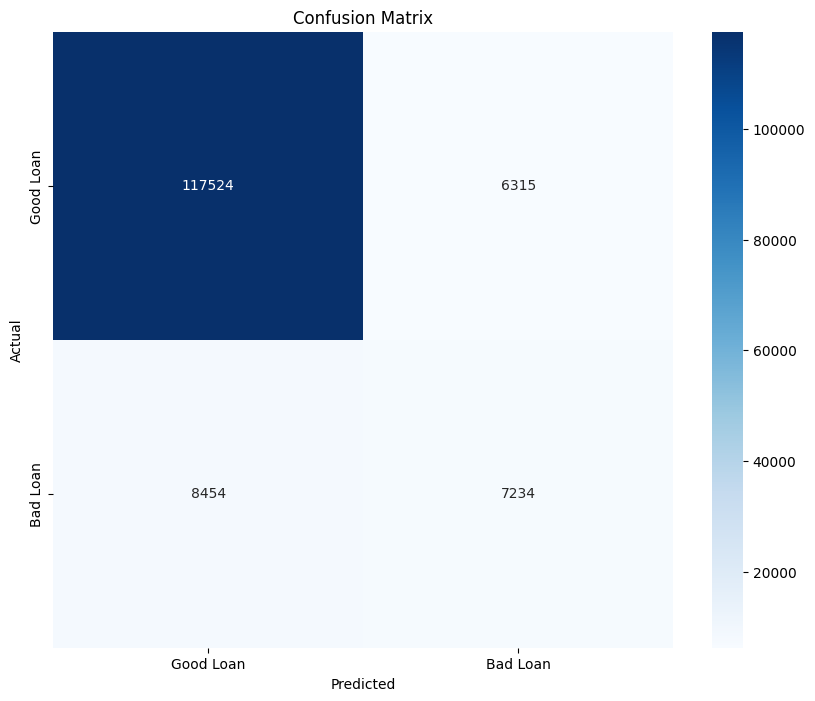

In [127]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_knn)

# Reverse the order of values in the confusion matrix
conf_matrix = np.flip(conf_matrix)

# Define class labels
class_labels = ['Good Loan', 'Bad Loan']  # Reverse the order to match the confusion matrix

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### RFC Eval

In [80]:
# Logistic Reggression Classifier Evaluation

sensitivity_rfc = calculate_sensitivity(y_test,y_pred_rfc)
specificity_rfc = calculate_specificity(y_test,y_pred_rfc)
auc_roc_rfc = roc_auc_score(y_test,y_prob_rfc)

In [83]:
# Print evaluation metrics
print('Sensitivity: {:.4f}'.format(sensitivity_rfc))
print('Specificity: {:.4f}'.format(specificity_rfc))
print('AUC Score: {:.4f}'.format(auc_roc_rfc))


Sensitivity: 0.8708
Specificity: 0.8073
AUC Score: 0.9294


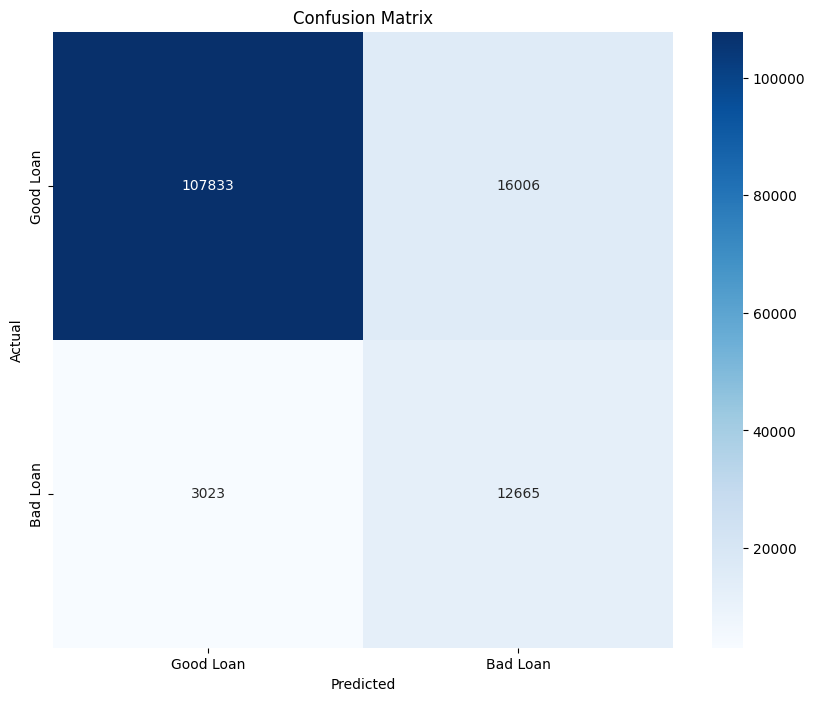

In [84]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rfc)

# Reverse the order of values in the confusion matrix
conf_matrix = np.flip(conf_matrix)

# Define class labels
class_labels = ['Good Loan', 'Bad Loan']  # Reverse the order to match the confusion matrix

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### AUC ROC Curve and K-S Test Plot

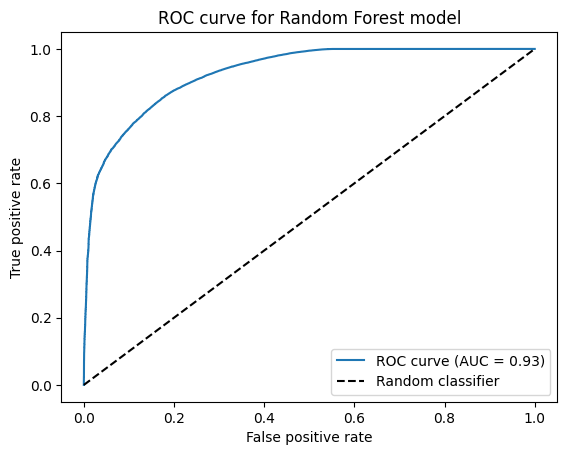

In [85]:
# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rfc)

# Calculate Area under the ROC Curve
roc_auc = roc_auc_score(y_test, y_prob_rfc)

# Plot
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for Random Forest model')
plt.legend(loc='lower right')
plt.show()

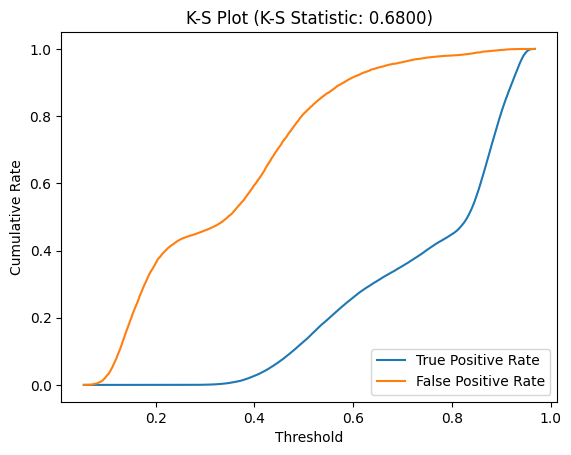

In [86]:
# Sort the predicted probabilities and the labels in ascending order
sorted_probs, sorted_labels = zip(*sorted(zip(y_prob_rfc, y_test)))
sorted_labels = np.array(sorted_labels)

# cumulative sums of TPR and FPR
cumulative_tpr = np.cumsum(sorted_labels) / sum(y_test)
cumulative_fpr = np.cumsum(1 - sorted_labels) / (len(y_test) - sum(y_test))

# Calculate the K-S statistic
ks_statistic = np.max(np.abs(cumulative_tpr - cumulative_fpr))


plt.plot(sorted_probs, cumulative_tpr, label='True Positive Rate')
plt.plot(sorted_probs, cumulative_fpr, label='False Positive Rate')
plt.xlabel('Threshold')
plt.ylabel('Cumulative Rate')
plt.title('K-S Plot (K-S Statistic: {:.4f})'.format(ks_statistic))
plt.legend(loc='lower right')
plt.show()


In [87]:
tp, fn, fp, tn = conf_matrix.ravel()

In [88]:
print(X.columns)

Index(['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal',
       ...
       'addr_state_TX', 'addr_state_UT', 'addr_state_VA', 'addr_state_VT',
       'addr_state_WA', 'addr_state_WI', 'addr_state_WV', 'addr_state_WY',
       'initial_list_status_f', 'initial_list_status_w'],
      dtype='object', length=118)


## Model Interpretation (Feature Importance)

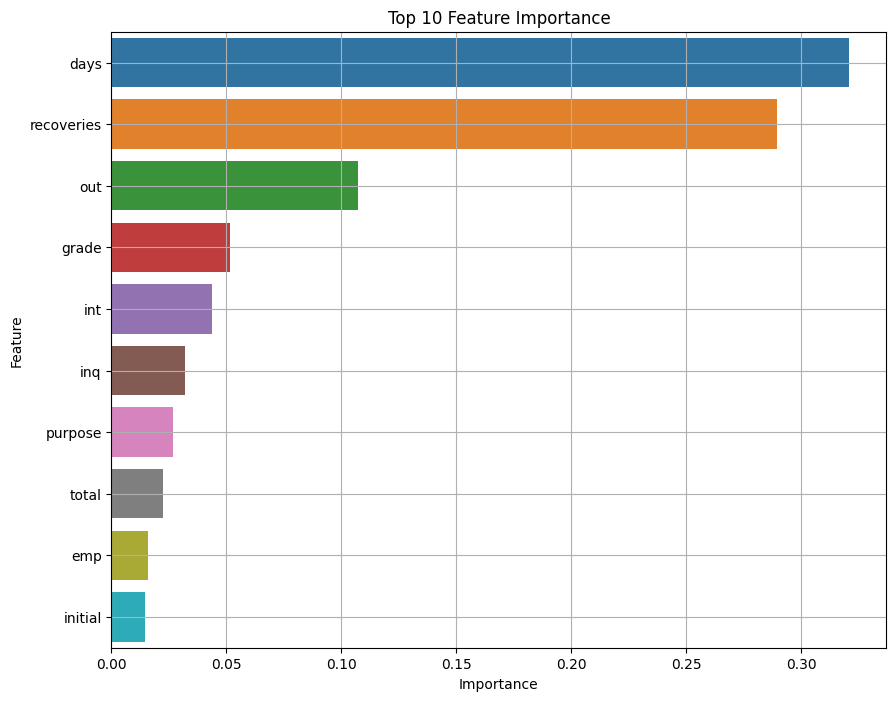

In [87]:
# Feature Importance 
feature_importance = best_rfc.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Combine one hot encoded features into one features
feature_importance_df['BaseFeature'] = feature_importance_df['Feature'].str.split('_').str[0]
feature_importance_df = feature_importance_df.groupby('BaseFeature', as_index=False)['Importance'].sum()

# Value sorting
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='BaseFeature', data=feature_importance_df)
plt.title('Top 10 Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid(True)
plt.show()


## E) Summary

- The Random Forest Classifier model is chosen as the primary model in this project because it performed better than logistic regression and KNN classifier model for credit risk binary classification in two out of three evaluation metrics that are used for comparison.
- Due to the large number of observations and features in the dataset, there are many preprocessing methods used in this project before the modelling begins which includes feature engineering and selection using Pearson's correlation, data cleaning, data imputation, and also SMOTE to handle imbalanced data.
- The Random forest classifier model performed considerably well on the testing set with an AUC score of **0.93** and K-S score of **0.68** which is considered a pretty good result in credit risk classification.
- Feature importance is used to interpret the model based on which features contribute more towards the modelling process. The feature "days_since_last_payment" shows the highest importance for the random forest classifier model
    